In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup as bs

In [2]:
d = pd.read_csv("data/train.csv")
d.head()

,Id,Title,Body,Tags,CreationDate,Y
0,34552656,Java: Repeat Task Every Random Seconds,<p>I'm already familiar with repeating tasks e...,<java><repeat>,2016-01-01 00:21:59,LQ_CLOSE
1,34553034,Why are Java Optionals immutable?,<p>I'd like to understand why Java 8 Optionals...,<java><optional>,2016-01-01 02:03:20,HQ
2,34553174,Text Overlay Image with Darkened Opacity React...,<p>I am attempting to overlay a title over an ...,<javascript><image><overlay><react-native><opa...,2016-01-01 02:48:24,HQ
3,34553318,Why ternary operator in swift is so picky?,"<p>The question is very simple, but I just cou...",<swift><operators><whitespace><ternary-operato...,2016-01-01 03:30:17,HQ
4,34553755,hide/show fab with scale animation,<p>I'm using custom floatingactionmenu. I need...,<android><material-design><floating-action-but...,2016-01-01 05:21:48,HQ


In [3]:
d.drop(['Id','CreationDate'],axis=1,inplace=True)
d.head()

,Title,Body,Tags,Y
0,Java: Repeat Task Every Random Seconds,<p>I'm already familiar with repeating tasks e...,<java><repeat>,LQ_CLOSE
1,Why are Java Optionals immutable?,<p>I'd like to understand why Java 8 Optionals...,<java><optional>,HQ
2,Text Overlay Image with Darkened Opacity React...,<p>I am attempting to overlay a title over an ...,<javascript><image><overlay><react-native><opa...,HQ
3,Why ternary operator in swift is so picky?,"<p>The question is very simple, but I just cou...",<swift><operators><whitespace><ternary-operato...,HQ
4,hide/show fab with scale animation,<p>I'm using custom floatingactionmenu. I need...,<android><material-design><floating-action-but...,HQ


In [4]:
def get_text_code(soup):
    t = ''
    for i in soup.find_all('p'):
        t = t+' '+i.get_text()
    t = t.lstrip()
    c = ''
    n = 0
    for i in soup.find_all('code'):
        c = c+' '+i.get_text()
        n += 1
    c = c.lstrip()
    return t,c,n

def get_tags(a):
    a = a.split("<")[1:]
    l = []
    for i in a:
        l.append(i.split('>')[0])
    return l

In [5]:
d['Body_statements'] = '0'
d['Body_code'] = '0'
d['Code_blocks'] = 0
for i in d.index:
    soup = bs(d.loc[i]['Body'])
    t,c,n = get_text_code(soup)
    d.at[i,'Body_statements'] = t
    d.at[i,'Body_code'] = c
    d.at[i,'Code_blocks'] = n

d.head()

,Title,Body,Tags,Y,Body_statements,Body_code,Code_blocks
0,Java: Repeat Task Every Random Seconds,<p>I'm already familiar with repeating tasks e...,<java><repeat>,LQ_CLOSE,I'm already familiar with repeating tasks ever...,,0
1,Why are Java Optionals immutable?,<p>I'd like to understand why Java 8 Optionals...,<java><optional>,HQ,I'd like to understand why Java 8 Optionals we...,,0
2,Text Overlay Image with Darkened Opacity React...,<p>I am attempting to overlay a title over an ...,<javascript><image><overlay><react-native><opa...,HQ,I am attempting to overlay a title over an ima...,//component for article preview touchable imag...,1
3,Why ternary operator in swift is so picky?,"<p>The question is very simple, but I just cou...",<swift><operators><whitespace><ternary-operato...,HQ,"The question is very simple, but I just could ...","return x == 0? """" : ""Hello""\n return x == 0 ? ...",5
4,hide/show fab with scale animation,<p>I'm using custom floatingactionmenu. I need...,<android><material-design><floating-action-but...,HQ,I'm using custom floatingactionmenu. I need to...,,0


In [6]:
# Todo - get all the tags. Make some nice visualization of the tags and their prevelance.
import re

a = d.loc[2]['Tags']
a = a.split("<")[1:]
l = []
for i in a:
    l.append(i.split('>')[0])
print(l)

['javascript', 'image', 'overlay', 'react-native', 'opacity']


In [7]:
d['Num Tags'] = 0
d['Tags_str'] = ''
words = []
for i in d.index:
    l = get_tags(d.loc[i]['Tags'])
    d.at[i,'Num Tags'] = len(l)
    d.at[i,'Tags_str'] = l
    for j in l:
        words.append(j)

d.head()

,Title,Body,Tags,Y,Body_statements,Body_code,Code_blocks,Num Tags,Tags_str
0,Java: Repeat Task Every Random Seconds,<p>I'm already familiar with repeating tasks e...,<java><repeat>,LQ_CLOSE,I'm already familiar with repeating tasks ever...,,0,2,"[java, repeat]"
1,Why are Java Optionals immutable?,<p>I'd like to understand why Java 8 Optionals...,<java><optional>,HQ,I'd like to understand why Java 8 Optionals we...,,0,2,"[java, optional]"
2,Text Overlay Image with Darkened Opacity React...,<p>I am attempting to overlay a title over an ...,<javascript><image><overlay><react-native><opa...,HQ,I am attempting to overlay a title over an ima...,//component for article preview touchable imag...,1,5,"[javascript, image, overlay, react-native, opa..."
3,Why ternary operator in swift is so picky?,"<p>The question is very simple, but I just cou...",<swift><operators><whitespace><ternary-operato...,HQ,"The question is very simple, but I just could ...","return x == 0? """" : ""Hello""\n return x == 0 ? ...",5,5,"[swift, operators, whitespace, ternary-operato..."
4,hide/show fab with scale animation,<p>I'm using custom floatingactionmenu. I need...,<android><material-design><floating-action-but...,HQ,I'm using custom floatingactionmenu. I need to...,,0,3,"[android, material-design, floating-action-but..."


In [20]:
from wordcloud import WordCloud

def make_wc(word_list,max_words=50):
    l = " ".join(i for i in word_list)
    wordcloud = WordCloud(collocations=False,max_font_size=50, max_words=max_words).generate(l)
    plt.figure(figsize=(20,20))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

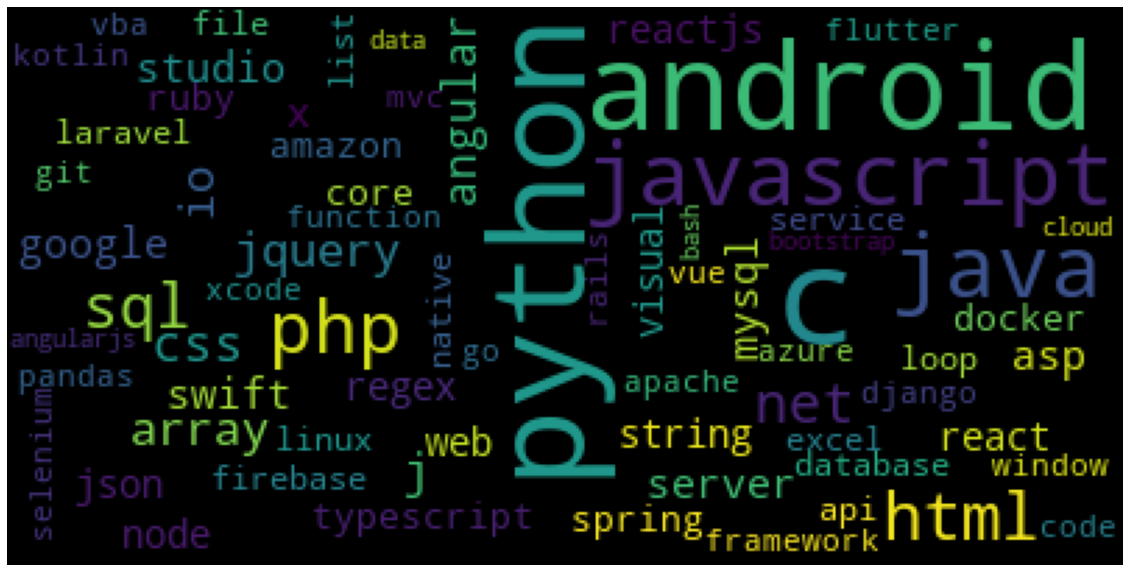

In [21]:
make_wc(words,70)